In [8]:
import pyvista as pv
from Kirchhoffpy import lenspy
from Kirchhoffpy import Feedpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from Kirchhoffpy import coordinate,field_storage
from Kirchhoffpy.Vopy import CO,dotproduct,abs_v
c=299792458
p = pv.Plotter()
srffolder = 'srf/'


In [9]:
# 1. define frequnecy and wavelength
freq = 150*10**9
Lambda = c*1000/freq
k = 2*np.pi/Lambda
print(Lambda,k)


1.9986163866666666 3.1437675329275225


In [10]:
# 2. define coordinate systems
coord_ref = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz')

coord_L1 = coordinate.coord_sys([0,0,-(803.9719951339465-4.34990822154231*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L2 = coordinate.coord_sys([0,0,-(227.64396727901004-4.696706712699847*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L3 = coordinate.coord_sys([0,0,-(71.77590111674095-2.96556*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_feed = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_sky = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)


In [11]:
# 3. define input Feedhorn
feed= Feedpy.GaussiBeam(-2.1714724,
                        10.1161095,
                        k,
                        coord_feed,
                        polarization = 'x')


26584903304305.848


In [12]:
# 4. Lenses and aperture 
L1 = lenspy.simple_Lens(3.36,
                        4.34990822154231*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens1_f2.rsf', 
                        srffolder + 'lens1_f1.rsf',
                        p,
                        coord_L1,
                        name = 'L1',
                        outputfolder = 'output2/150GHz/')
L2 = lenspy.simple_Lens(3.36,
                        4.69671*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens2_f2.rsf', 
                        srffolder + 'lens2_f1.rsf',
                        p,
                        coord_L2,
                        name = 'L2',
                        outputfolder = 'output2/150GHz/')

L3 = lenspy.simple_Lens(3.36,
                        2.96556*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens3_f2.rsf', 
                        srffolder + 'lens3_f1.rsf',
                        p,
                        coord_L3,
                        name = 'L3',
                        outputfolder = 'output2/150GHz/')
#L2 = lenspy.simple_Lens(2,46.9671 ,400, srffolder + 'lens2_f1.rsf', srffolder + 'lens2_f2.rsf',p,[0,0,-227.64396727901004],name = 'L2')
#L3 = lenspy.simple_Lens(2,29.6556 ,400, srffolder + 'lens3_f1.rsf', srffolder + 'lens3_f2.rsf',p,[0,0,-71.77590111674095],name = 'L3')


In [16]:
# 5. fiedl storage
center_grd = field_storage.Spherical_grd(coord_sky,
                                         0,
                                         0,
                                         20,
                                         20,
                                         501,501,
                                         Type = 'ELoverAz', 
                                         far_near = 'far',
                                         distance = 50000)


In [13]:
N1 =[760,1520]
N2 = [570,820]
L3.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            feed,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


Gain of the Guassian feedhonr!
-6.631810613625867 dB
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
input power
poynting value max!
0.0036699209269393253
13.063284915468138
******
(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999996
cores: 47


100%|██████████| 6376/6376 [33:31<00:00,  3.17it/s]


(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
Transform f1
poynting value max!
0.0025946751773225753
8.727938458128717
f2
poynting value max!
0.0019037239443914216
8.913768771167755
f2 transmission
poynting value max!
6.410712340754501


In [14]:
N1 =[720,2240]
N2 = [250,255]
L2.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L3,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2/150GHz/L3_po_cur_0mm.h5
Here
cores: 117


100%|██████████| 8799/8799 [46:29<00:00,  3.15it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
input power
poynting value max!
0.00011633171182380066
6.477607223458336
******
(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
cores: 34


100%|██████████| 1220/1220 [06:25<00:00,  3.16it/s]


(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
Transform f1
poynting value max!
8.224782131667317e-05
4.381774557900445
f2
poynting value max!
6.624048089049378e-05
4.440761060289935
f2 transmission
poynting value max!
3.1455784406899086


In [15]:
N1 =[660,2240]
N2 = [610,185]
L1.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L2,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2/150GHz/L2_po_cur_0mm.h5
Here
cores: 845


100%|██████████| 1116/1116 [05:47<00:00,  3.22it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
input power
poynting value max!
5.250299571831265e-06
2.8938758288689814
******
(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
cores: 37


100%|██████████| 2001/2001 [10:33<00:00,  3.16it/s]


(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999996
Transform f1
poynting value max!
3.712016029167059e-06
2.035336337497319
f2
poynting value max!
3.5803429757774e-06
2.0150450400345448
f2 transmission
poynting value max!
1.4296897430551339


In [9]:
center_grd.grid.x = center_grd.grid.x.ravel()
center_grd.grid.y = center_grd.grid.y.ravel()
center_grd.grid.z = center_grd.grid.z.ravel()
print(center_grd.grid.z.size)


40401


In [17]:
#L1.surf_cur_file = 'output/L1_po_cur_0mm_x.h5'

L1.source(center_grd,
          k,
          far_near = 'far')


output2/150GHz/L1_po_cur_0mm.h5
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
*(**)
cores: 789


100%|██████████| 318/318 [00:31<00:00, 10.24it/s]


In [18]:
r, theta, phi = center_grd.coord_sys._toSpherical(center_grd.grid.x,center_grd.grid.y,center_grd.grid.z)
co,cx,crho = CO(theta,phi)
E_co = dotproduct(center_grd.E,co)
E_cx = dotproduct(center_grd.E,cx)


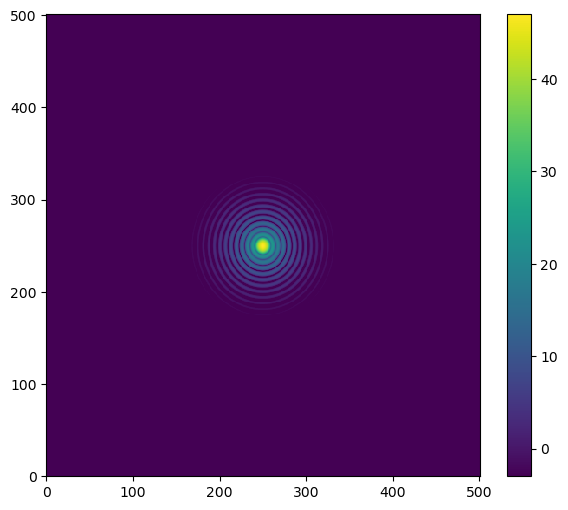

In [24]:
fig = plt.figure(figsize = (7,6))
vmax= np.log10(np.abs(E_co.reshape(501,-1)).max())*20
plt.pcolor(np.log10(np.abs(E_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


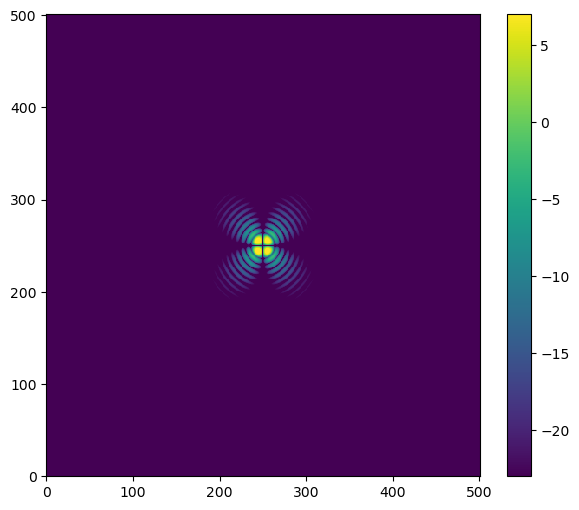

In [25]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


In [26]:
import h5py as h5
def readh5(fname):
    name = fname.split('.')
    with h5.File(name[0]+'.h5','r') as f:
        co = f['co-polar'][:,:]
        cx = f['cx-polar'][:,:]
        Az = f['Az'][:]
        El = f['El'][:]
    return Az, El, co, cx


In [27]:
Az, El, grasp_co,grasp_cx = readh5('output2/150GHz/150GHz_test/_H5/_x0_y0GHz.h5')


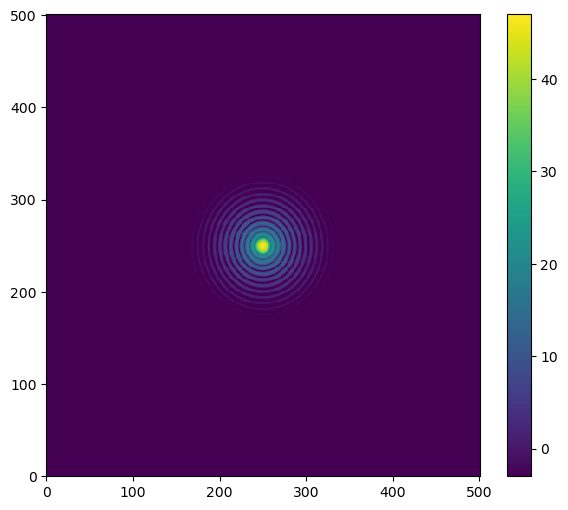

In [31]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


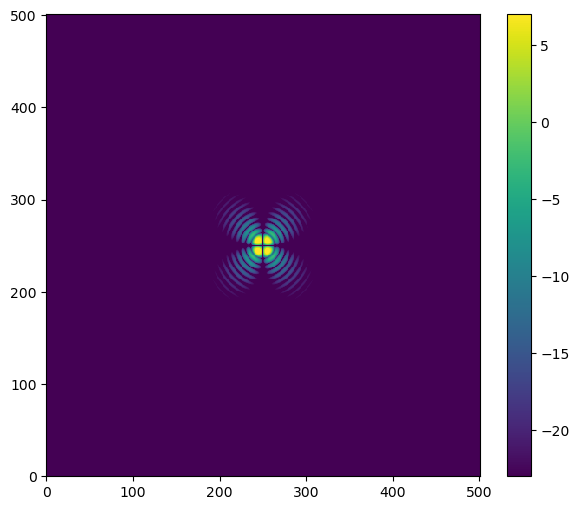

In [33]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


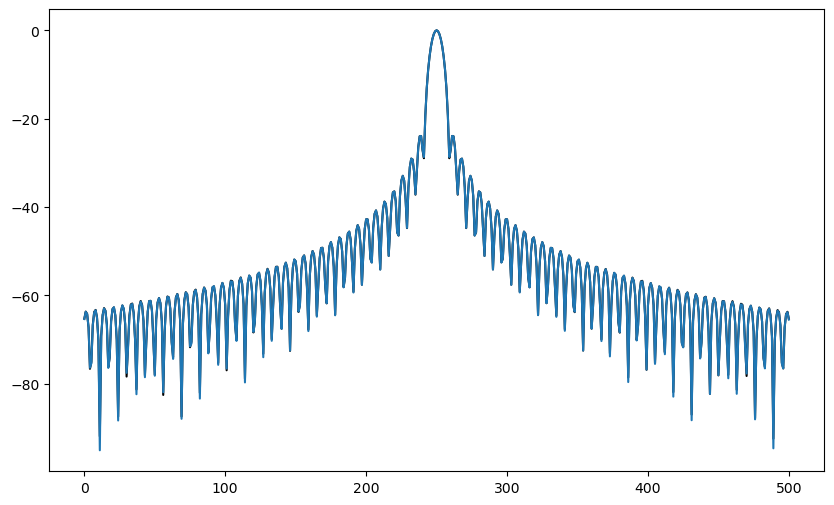

In [34]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:])/np.abs(grasp_co.reshape(501,-1)[250,:]).max())*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])/np.abs(E_co.reshape(501,-1)[250,:]).max())*20,'-')


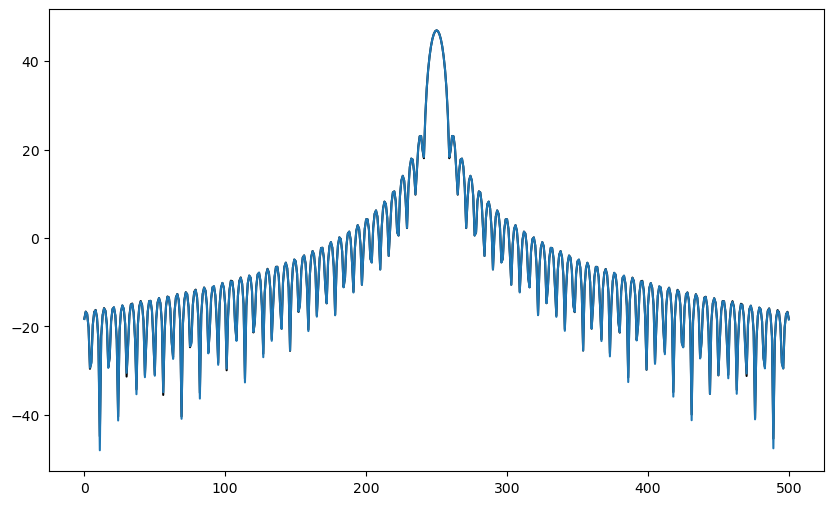

In [35]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


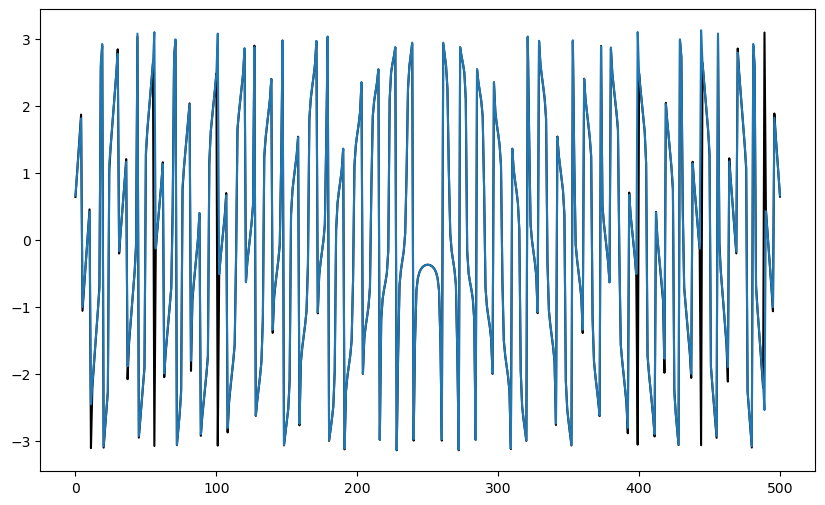

In [36]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.angle(grasp_co.reshape(501,-1)[250,:]/np.abs(grasp_co.reshape(501,-1)[250,:]).max()),'k-')
plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/np.abs(E_co.reshape(501,-1)[250,:]).max()),'-')


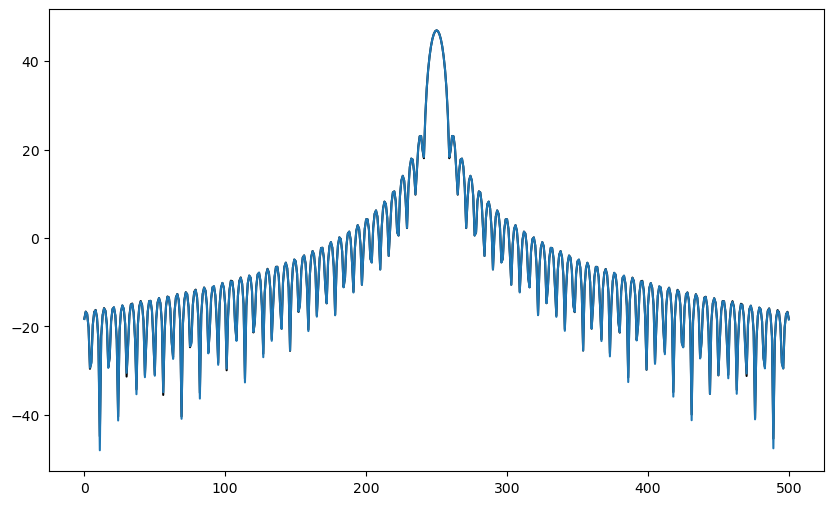

In [38]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [63]:
G_co = grasp_co.reshape(501,-1).T/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]
err = H_co-G_co


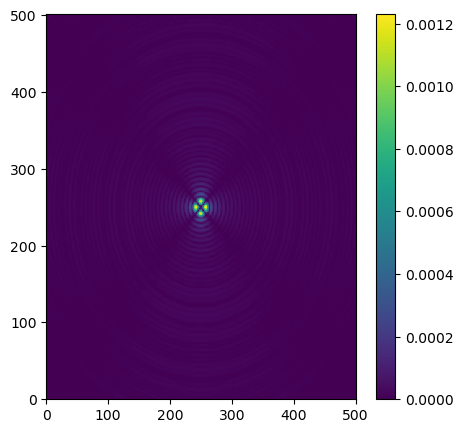

In [64]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


In [43]:
G_co = grasp_co.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = G_co-G_co.T
err2 = H_co-H_co.T


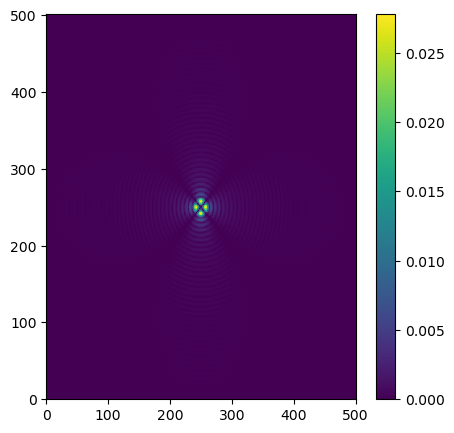

In [44]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


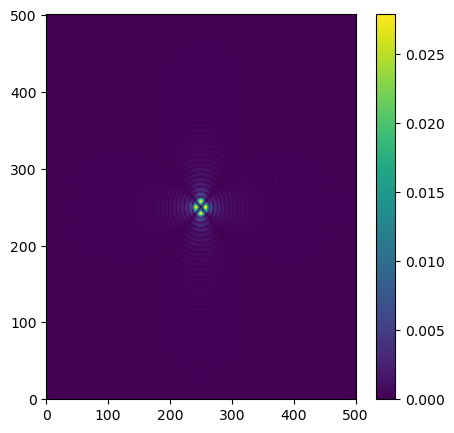

In [45]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err2))
plt.colorbar()


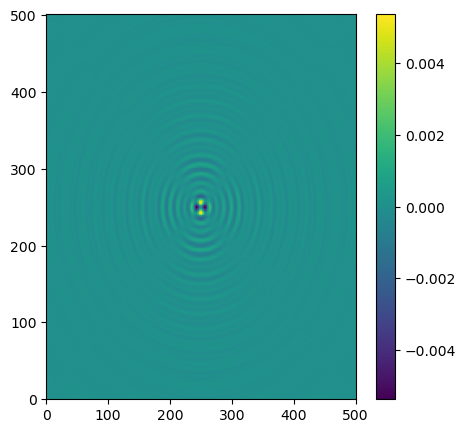

In [46]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(err.imag)
plt.colorbar()


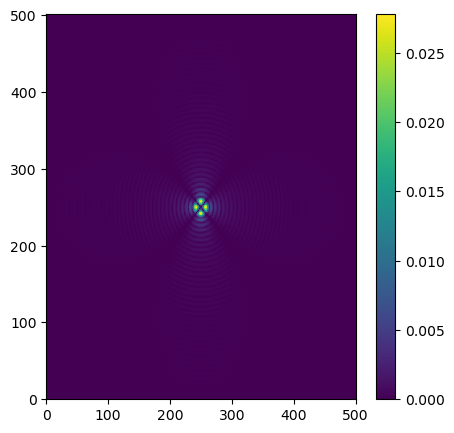

In [47]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


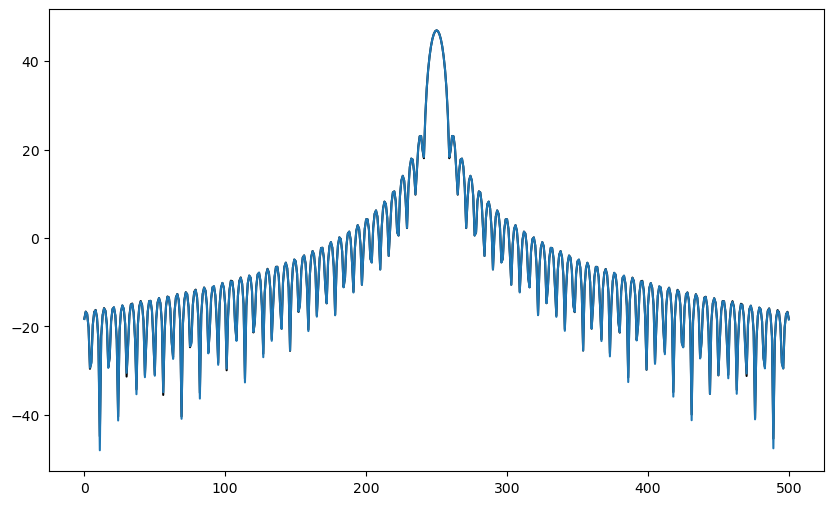

In [48]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


(-1.0, 1.0)

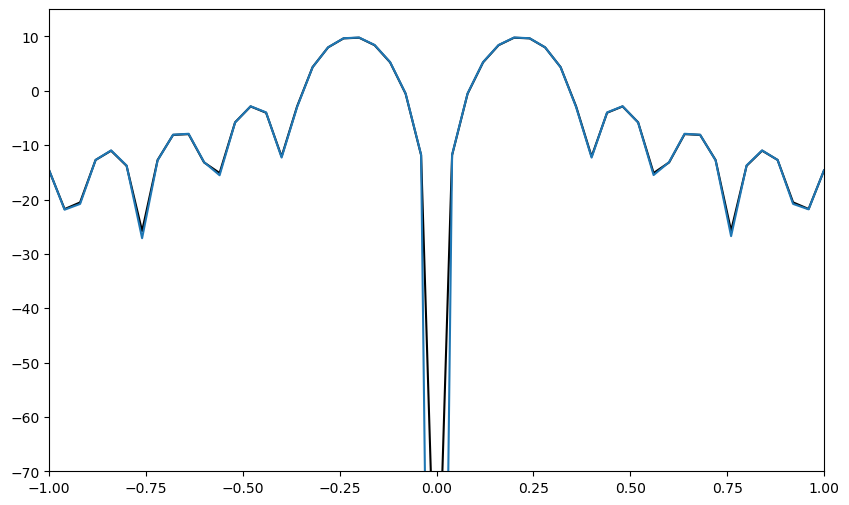

In [60]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-70,15])
plt.xlim([-1,1])


In [3]:
L_lensFp_3   = 7.177590111674096
L_lens3_2    = 15.586806616226909
L_lens2_1    = 57.632802785493645
L_lens1_Lyot = 1.162050628144469
L_Ly_vw      = 22.7114

L_lens1_ref = L_lensFp_3 + L_lens3_2 + L_lens2_1
L_lens2_ref = L_lensFp_3 + L_lens3_2
L_lens3_ref = L_lensFp_3 
L_Ly_ref = L_lens1_ref + L_lens1_Lyot
L_vw_ref = L_Ly_ref + L_Ly_vw


In [ ]:
print(L_lens1_ref*10)
print(L_lens2_ref*10)
print(L_lens3_ref*10)


803.9719951339465
227.64396727901004
71.77590111674095


In [ ]:
Az.size


501